In [135]:
import pandas as pd
from utils import find_jurisdiction

In [136]:
df = pd.read_csv('20250523_Hackaton_SIAE.csv')
df2 = pd.read_csv('20250523_Clients_Historical.csv')
df.head()

/var/folders/yv/qqf0zjx14wg6d9h4_kyh7qb80000gn/T/ipykernel_7467/4092455349.py:1: DtypeWarning: Columns (11,13,14,15,22,23,26,27,28,29,32,33,34,35,36,37,38,39,41,42,43,46,47,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,72,73,75,76,77,78,79,82,83,84,85,86,87,88,89,93,94,95,96,97,99) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('20250523_Hackaton_SIAE.csv')


,lon,visible,tags,timestamp,changeset,lat,id,poi_type,version,addr:city,...,geometry,osm_type,biergarten,kiosk,motorcycle,water,playground,building:flats,building:material,building:min_level
0,12.477248,0.0,"{""air_conditioning"":""yes"",""check_date"":""2023-0...",1701610524,0.0,41.901058,32631124,cafe,13,Roma,...,POINT (12.477248191833496 41.901058197021484),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12.533271,0.0,"{""brand"":""IP"",""compressed_air"":""yes"",""ref:mise...",1652769104,0.0,41.861176,226903493,fuel,7,NaN,...,POINT (12.533270835876465 41.861175537109375),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12.442811,0.0,"{""brand"":""Esso"",""brand:wikidata"":""Q867662"",""re...",1726056413,0.0,41.860683,226912127,fuel,5,NaN,...,POINT (12.442811012268066 41.86068344116211),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12.440217,0.0,"{""brand"":""Eni"",""brand:wikidata"":""Q565594"",""fue...",1743327252,0.0,41.879536,226914361,fuel,10,NaN,...,POINT (12.440217018127441 41.87953567504883),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.508201,0.0,"{""brand"":""Eni"",""brand:wikidata"":""Q565594"",""ref...",1747146863,0.0,41.837406,226930875,fuel,8,NaN,...,POINT (12.508200645446777 41.837406158447266),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
df_for_fee = df2.merge(df, on='id', how='left')
pd.DataFrame(df_for_fee["poi_type"].unique()).to_csv("TipiClientiReali.csv")
fee_means = df_for_fee.groupby("poi_type")["fee_value"].mean()
df["fee_value"] = df["poi_type"].map(fee_means)

In [138]:
df = df[['lat', 'lon', 'poi_type', 'id', 'osm_type', 'fee_value']]

In [139]:
df.head()

,lat,lon,poi_type,id,osm_type,fee_value
0,41.901058,12.477248,cafe,32631124,node,110.481682
1,41.861176,12.533271,fuel,226903493,node,NaN
2,41.860683,12.442811,fuel,226912127,node,NaN
3,41.879536,12.440217,fuel,226914361,node,NaN
4,41.837406,12.508201,fuel,226930875,node,NaN


In [140]:
# Count null values per column
null_counts = df.isnull().sum()
print("Number of null values per column:")
print(null_counts)

Number of null values per column:
lat          43710
lon          43710
poi_type     36737
id               0
osm_type         0
fee_value    55846
dtype: int64


In [141]:
df['osm_type'].unique()
df = df[df['osm_type'] == 'node']

In [142]:
df.head()

,lat,lon,poi_type,id,osm_type,fee_value
0,41.901058,12.477248,cafe,32631124,node,110.481682
1,41.861176,12.533271,fuel,226903493,node,NaN
2,41.860683,12.442811,fuel,226912127,node,NaN
3,41.879536,12.440217,fuel,226914361,node,NaN
4,41.837406,12.508201,fuel,226930875,node,NaN


In [143]:
# Count total number of entries
total_entries = len(df)
print(f"Total number of entries: {total_entries}")

# Count entries by poi_type
poi_type_counts = df['poi_type'].value_counts()
print("\nNumber of entries by POI type:")
print(poi_type_counts)

Total number of entries: 17742

Number of entries by POI type:
poi_type
restaurant          2006
bench               1881
cafe                1035
drinking_water       983
clothes              605
                    ... 
recording_studio       1
boat_rental            1
dairy                  1
payment_terminal       1
giant_furniture        1
Name: count, Length: 315, dtype: int64


In [144]:
# Drop rows from df where id matches any id in df2
df = df[~df['id'].isin(df2['id'])]

In [145]:
df.head()

,lat,lon,poi_type,id,osm_type,fee_value
0,41.901058,12.477248,cafe,32631124,node,110.481682
1,41.861176,12.533271,fuel,226903493,node,NaN
2,41.860683,12.442811,fuel,226912127,node,NaN
3,41.879536,12.440217,fuel,226914361,node,NaN
4,41.837406,12.508201,fuel,226930875,node,NaN


In [146]:
len(df)

13924

In [147]:
df.isnull().sum()

lat              0
lon              0
poi_type        22
id               0
osm_type         0
fee_value    12676
dtype: int64

In [148]:
# Get entries where poi_type is null
null_poi_types = df[df['poi_type'].isnull()]
print(f"\nNumber of entries with null poi_type: {len(null_poi_types)}")
print("\nSample of entries with null poi_type:")
print(null_poi_types[['id', 'lat', 'lon', 'poi_type']].head())


Number of entries with null poi_type: 22

Sample of entries with null poi_type:
              id        lat        lon poi_type
1902  1447566610  41.891399  12.485294      NaN
2333  1658732749  41.836365  12.494436      NaN
2801  1827481786  41.862789  12.479863      NaN
3382  2235494523  41.904587  12.456250      NaN
3594  2399335237  41.908497  12.503596      NaN


In [149]:
# Drop rows where poi_type is null
df = df.dropna(subset=['poi_type'])

# Verify the drop
print(f"Number of entries after dropping null poi_types: {len(df)}")
print("\nNull values remaining:")
print(df.isnull().sum())

Number of entries after dropping null poi_types: 13902

Null values remaining:
lat              0
lon              0
poi_type         0
id               0
osm_type         0
fee_value    12654
dtype: int64


In [150]:
len(df)

13902

In [151]:
df3 = pd.read_csv('jurisdictions.csv')
df3.head()

,jurisdiction,lat_min,lat_max,lon_min,lon_max
0,J1,41.8128,41.8486,12.43652,12.48511
1,J2,41.8128,41.8486,12.48511,12.53370
2,J3,41.8486,41.8844,12.43652,12.48511
3,J4,41.8486,41.8844,12.48511,12.53370
4,J5,41.8844,41.9202,12.43652,12.48511


In [152]:
# Applica la funzione a tutte le righe di df
df['jurisdiction'] = df.apply(lambda row: find_jurisdiction(row['lat'], row['lon'], df3), axis=1)

# Visualizza il risultato
print(df[['lat', 'lon', 'jurisdiction']].head())

         lat        lon jurisdiction
0  41.901058  12.477248           J5
1  41.861176  12.533271           J4
2  41.860683  12.442811           J3
3  41.879536  12.440217           J3
4  41.837406  12.508201           J2


In [153]:
len(df)

13902

In [154]:
df_real_clients = pd.read_csv('TipiClientiReali.csv', index_col=0)
df_real_clients

,0
0,cafe
1,restaurant
2,hotel
3,theatre
4,fast_food
5,pub
6,bar
7,bakery
8,hostel
9,hairdresser


In [155]:
# Get list of valid client types from df_real_clients
valid_client_types = df_real_clients['0'].unique()

# Filter df to keep only rows where poi_type is in valid_client_types
df = df[df['poi_type'].isin(valid_client_types)]

# Print info about the filtering
print(f"Number of entries after filtering by valid client types: {len(df)}")
print("\nUnique poi_types remaining:")
print(df['poi_type'].unique())

Number of entries after filtering by valid client types: 1248

Unique poi_types remaining:
['cafe' 'theatre' 'pub' 'bar' 'restaurant' 'hotel' 'fast_food'
 'sports_centre' 'hostel' 'nightclub' 'bakery' 'hairdresser' 'sports'
 'swimming_pool' 'dentist' 'fitness_centre' 'music_school' 'events_venue']


In [156]:
df = df.drop(columns=['osm_type'])

In [157]:
df.to_csv('dataset.csv', index=False)


Number of points per jurisdiction:
jurisdiction
J1     41
J2     17
J3    155
J4    173
J5    430
J6    432
Name: count, dtype: int64


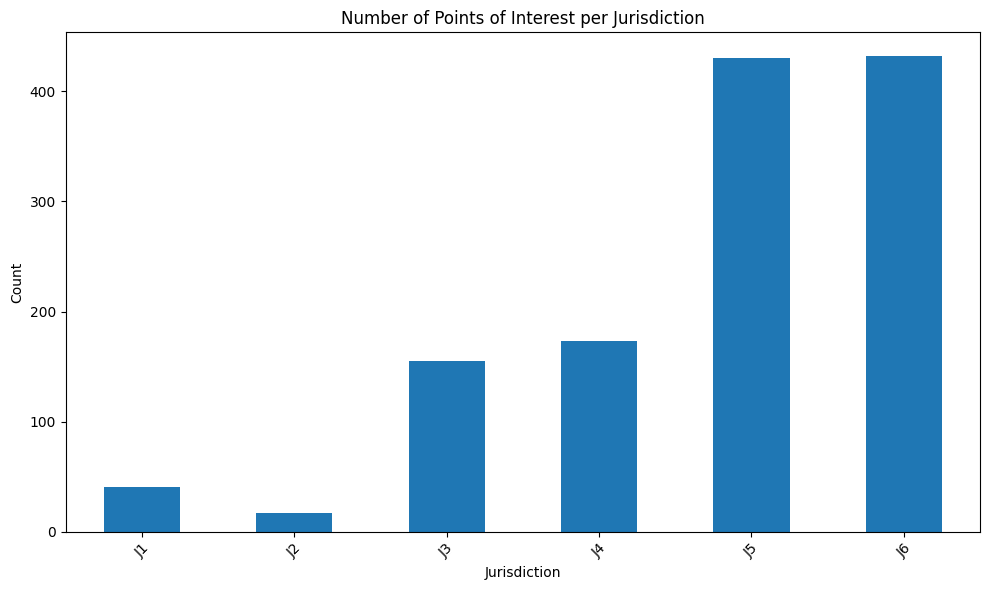

In [158]:
# Count points per jurisdiction
jurisdiction_counts = df['jurisdiction'].value_counts().sort_index()
print("\nNumber of points per jurisdiction:")
print(jurisdiction_counts)

# Optional: Create a bar plot to visualize the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
jurisdiction_counts.plot(kind='bar')
plt.title('Number of Points of Interest per Jurisdiction')
plt.xlabel('Jurisdiction')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()